# - The goal of this project is to practice importing data using the yahoo finance library, and do some basic analysis on a few of the most prominent American oil companies

### - Let's import all required libraries

In [44]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
%matplotlib inline
from jupyterthemes import jtplot
from pandas.plotting import scatter_matrix
import yfinance as yf
yf.pdr_override()
plt.style.use('dark_background')

### - Our time span will be from Jan 1st 2016 to Jan 1st 2022

In [45]:
start = datetime.datetime(2016,1,1)
end = datetime.datetime(2022,1,1)

### - I am choosing the top 5 American oil companies by market cap, and will read in their data from yaf

In [46]:
exxon = pdr.get_data_yahoo('XOM', start=start, end=end)
chevron = pdr.get_data_yahoo('CVX', start=start, end=end)
conoco = pdr.get_data_yahoo('COP', start=start, end=end)
eog = pdr.get_data_yahoo('EOG', start=start, end=end)
occidental = pdr.get_data_yahoo('OXY', start=start, end=end)

exxon.to_csv('Exxon_Stock.csv')
chevron.to_csv('Chevron_Stock')
conoco.to_csv('Conoco_Stock.csv')
eog.to_csv('EOG_Stock.csv')
occidental.to_csv('Occidental_Stock')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [47]:
exxon.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,77.500000,77.940002,76.459999,77.459999,54.520844,20400100
2016-01-05,77.190002,78.139999,76.919998,78.120003,54.985371,11993500
2016-01-06,76.639999,77.639999,76.589996,77.470001,54.527893,18826900
2016-01-07,76.059998,77.989998,75.900002,76.230003,53.655090,21263800
2016-01-08,76.349998,76.650002,74.500000,74.690002,52.571148,19033600


### - First let's take a look at their opening stock prices over the years and observe the general trend

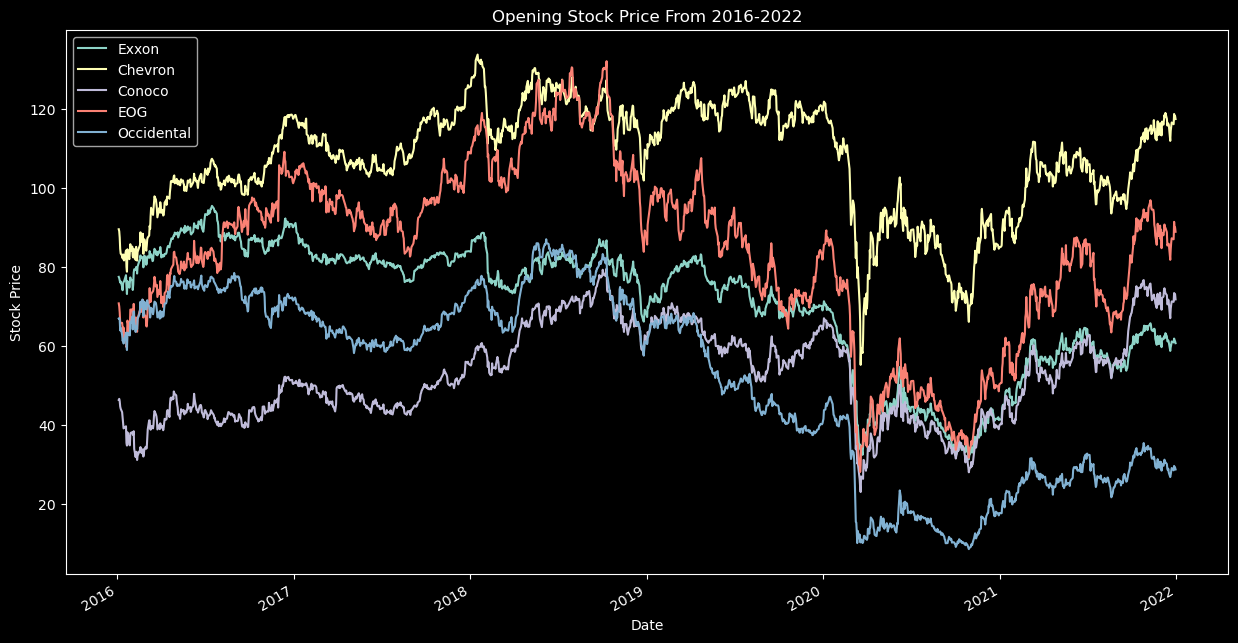

In [48]:
exxon['Open'].plot(label='Exxon', figsize=(15,8))
chevron['Open'].plot(label='Chevron')
conoco['Open'].plot(label='Conoco')
eog['Open'].plot(label='EOG')
occidental['Open'].plot(label='Occidental')
plt.title('Opening Stock Price From 2016-2022')
plt.ylabel('Stock Price')
plt.legend()

### - Here we can see that stock price moves here are highly correlated among these companies

### - As these 5 companies are highly correlated, there are a few segments where a few companies diverge.  I'll use a scatterplot to compare the correlation in open price between Exxon, Conco & Occidental.

array([[<AxesSubplot:xlabel='Exxon Open,', ylabel='Exxon Open,'>,
        <AxesSubplot:xlabel='Conoco Open', ylabel='Exxon Open,'>,
        <AxesSubplot:xlabel='Occidental Open', ylabel='Exxon Open,'>],
       [<AxesSubplot:xlabel='Exxon Open,', ylabel='Conoco Open'>,
        <AxesSubplot:xlabel='Conoco Open', ylabel='Conoco Open'>,
        <AxesSubplot:xlabel='Occidental Open', ylabel='Conoco Open'>],
       [<AxesSubplot:xlabel='Exxon Open,', ylabel='Occidental Open'>,
        <AxesSubplot:xlabel='Conoco Open', ylabel='Occidental Open'>,
        <AxesSubplot:xlabel='Occidental Open', ylabel='Occidental Open'>]],
      dtype=object)

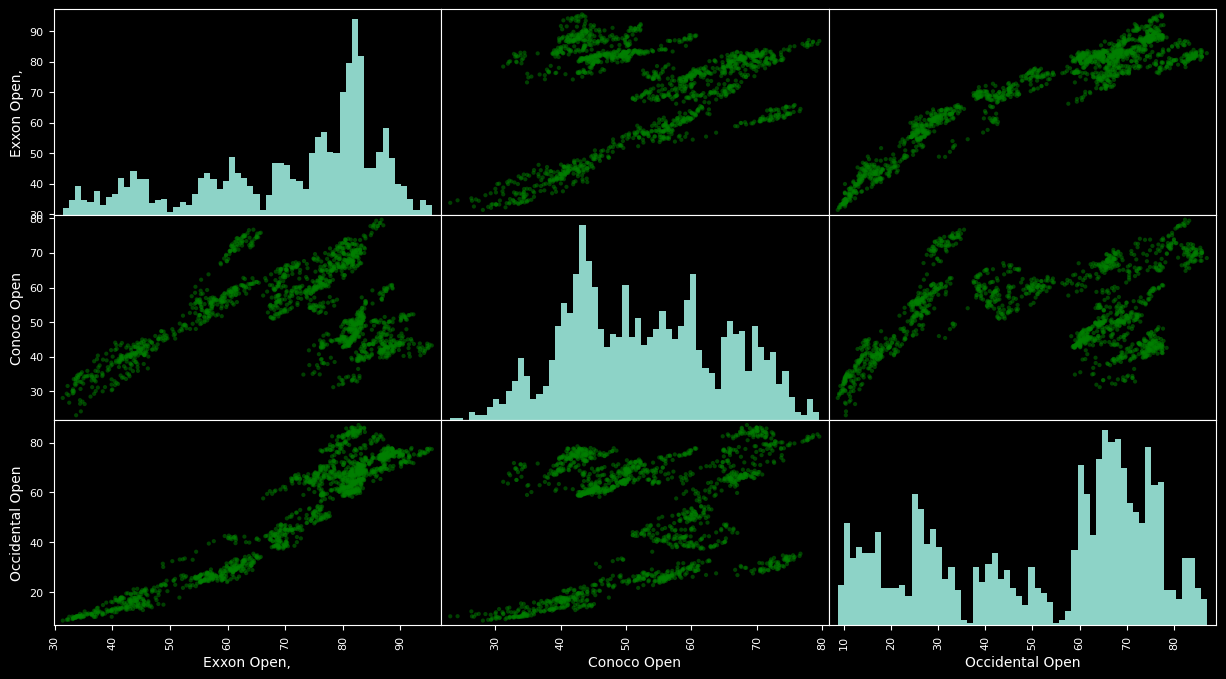

In [49]:
oil_comp1 = pd.concat([exxon['Open'],conoco['Open'],occidental['Open']], axis=1)
oil_comp1.columns = ['Exxon Open,','Conoco Open','Occidental Open']
scatter_matrix(oil_comp1, figsize=(15,8), hist_kwds={'bins':60}, color="green")

### - Taking a quick look here, we can see the change in open price between Exxon & Occidental are the most highly correlated.  While we see a much larger difference in correlation with Conoco when compared with the other two.  But why?

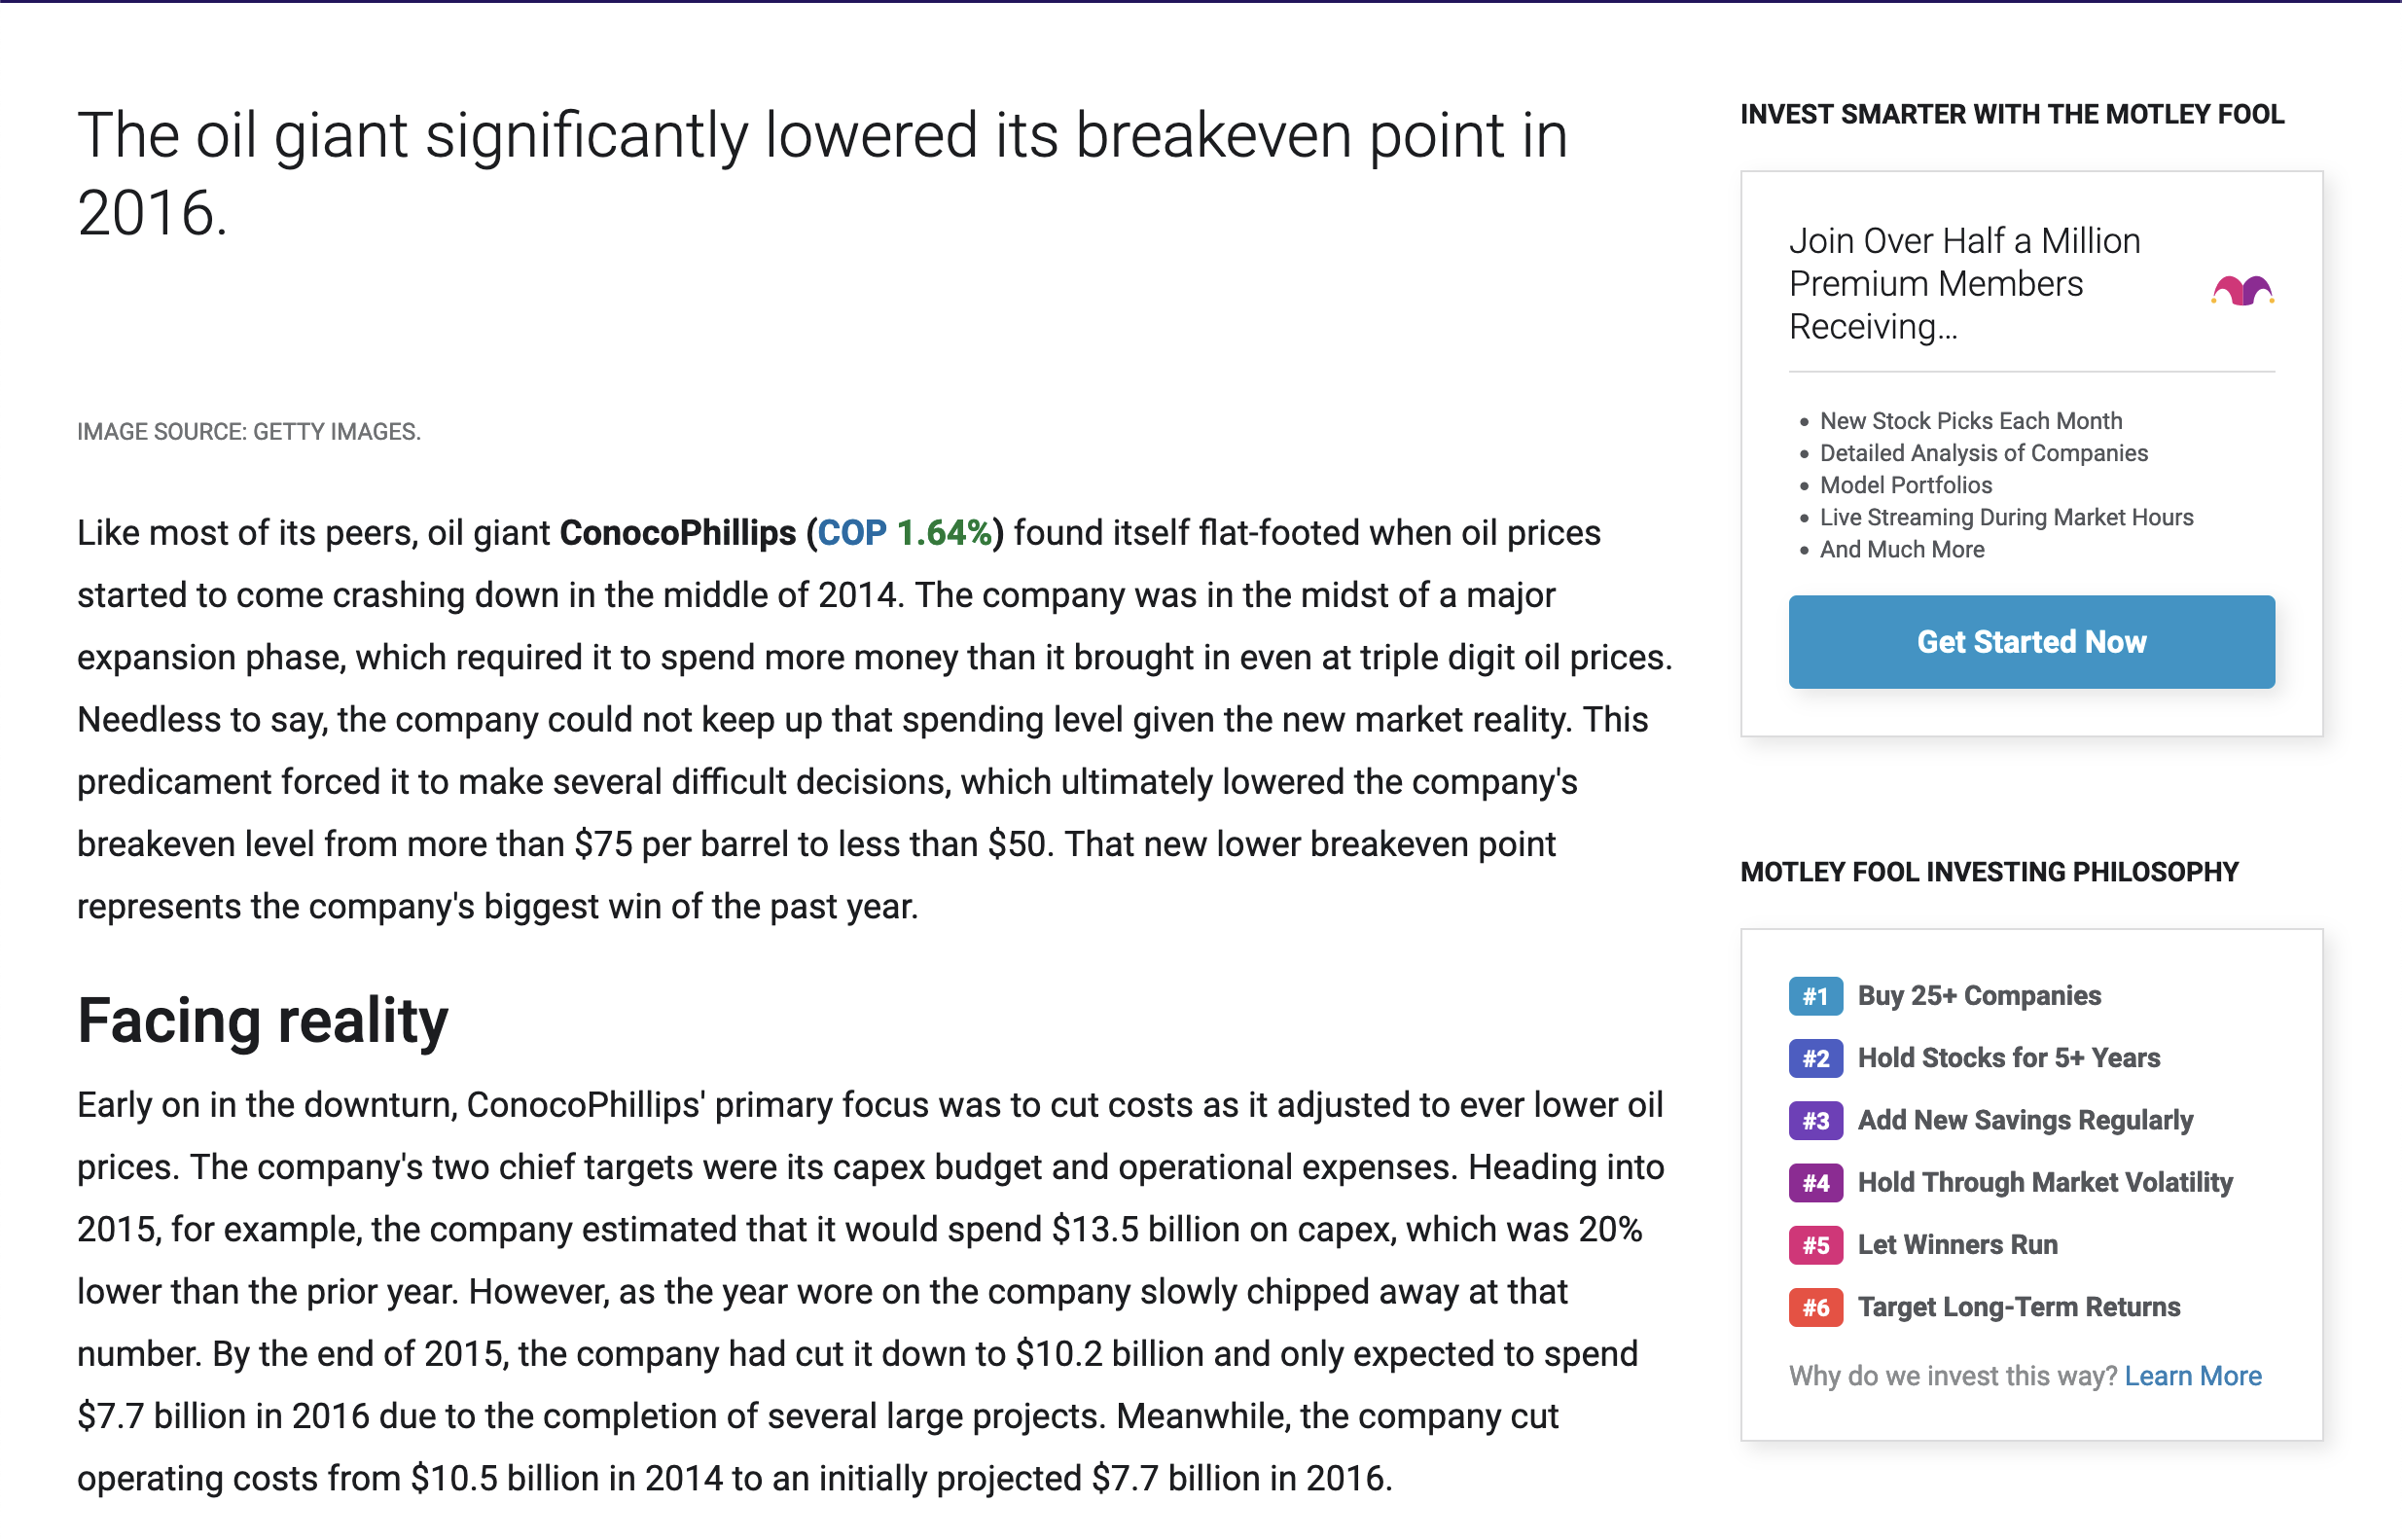

### - This article from the motley fool goes on to describe how the recent drop in oil price forced Conoco to cut costs.  Their expenses were going up, cashflow going down, all while trying to pay out their dividends.  Overall, they were just not comparatively as profitable.

### - Now let's take a look the top 3 by market cap and compare their volitility

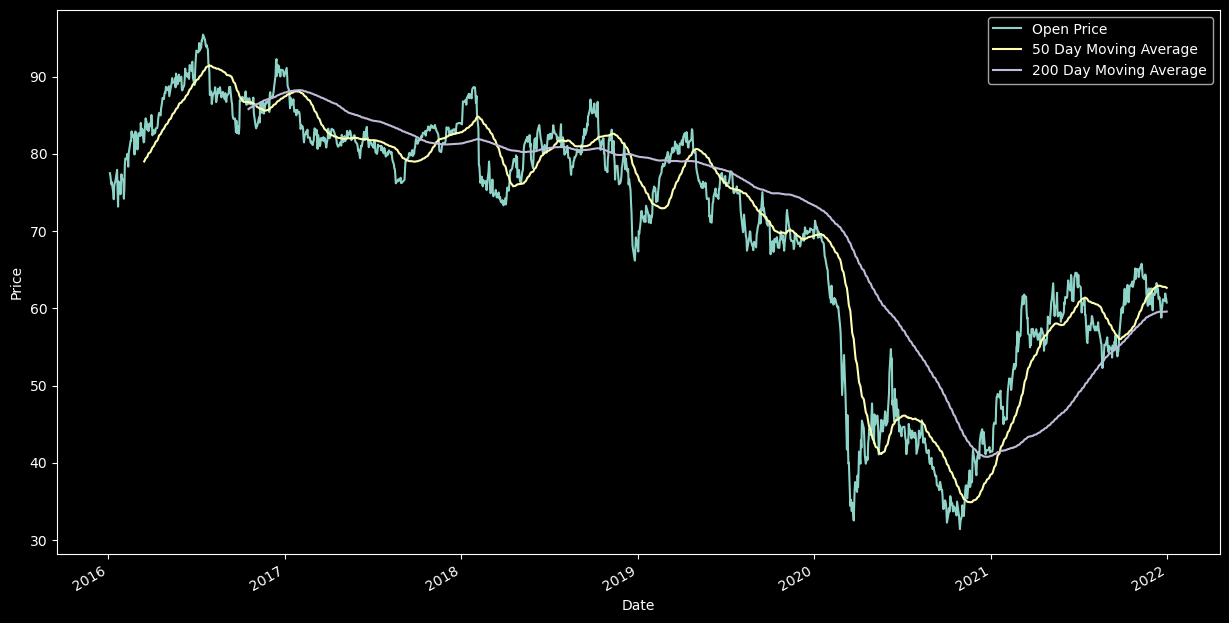

In [50]:
exxon['MA50'] = exxon['Open'].rolling(50).mean()
exxon['MA200'] = exxon['Open'].rolling(200).mean()
exxon['Open'].plot(label='Open Price', figsize=(15,8))
exxon['MA50'].plot(label='50 Day Moving Average')
exxon['MA200'].plot(label='200 Day Moving Average')
plt.ylabel('Price')
plt.legend()

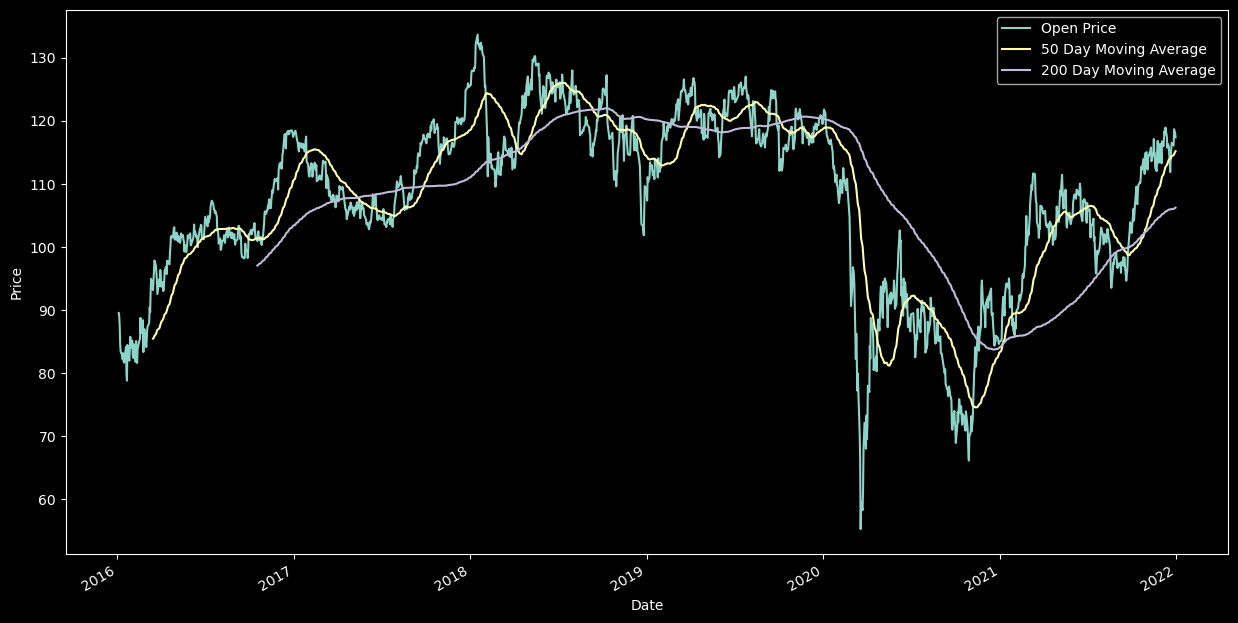

In [51]:
chevron['MA50'] = chevron['Open'].rolling(50).mean()
chevron['MA200'] = chevron['Open'].rolling(200).mean()
chevron['Open'].plot(label='Open Price', figsize=(15,8))
chevron['MA50'].plot(label='50 Day Moving Average')
chevron['MA200'].plot(label='200 Day Moving Average')
plt.ylabel('Price')
plt.legend()

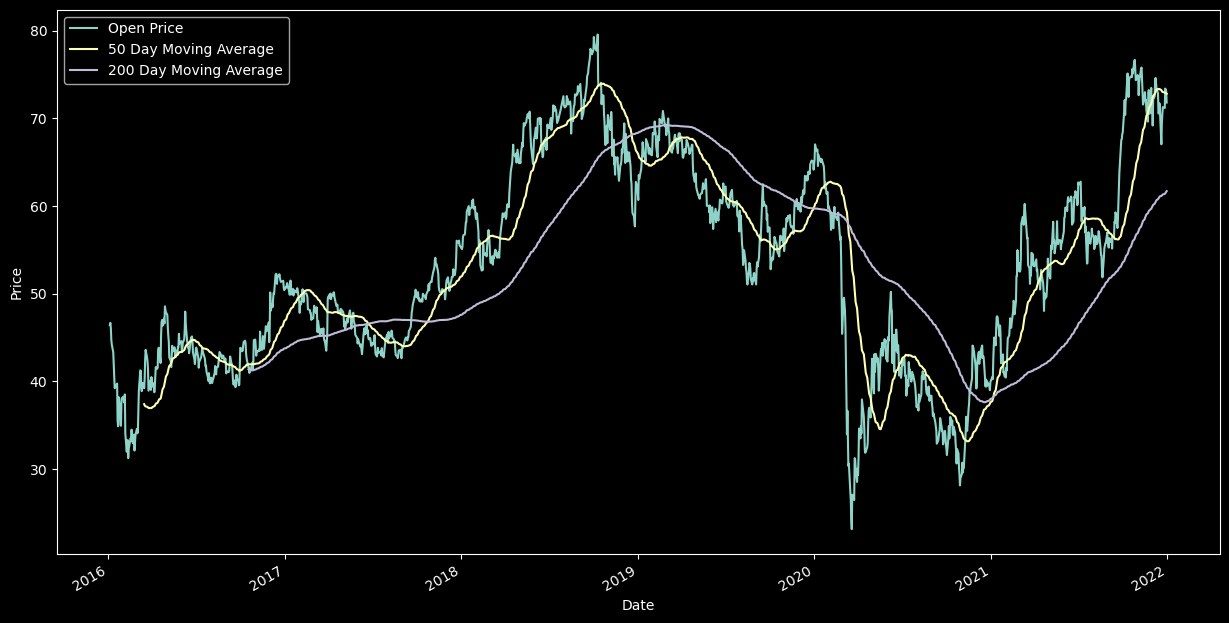

In [52]:
conoco['MA50'] = conoco['Open'].rolling(50).mean()
conoco['MA200'] = conoco['Open'].rolling(200).mean()
conoco['Open'].plot(label='Open Price', figsize=(15,8))
conoco['MA50'].plot(label='50 Day Moving Average')
conoco['MA200'].plot(label='200 Day Moving Average')
plt.ylabel('Price')
plt.legend()

### - Looking at these stocks individually, all are pretty volatile.  We will have to take a little closer look.  We will create a column that calculates daily percentage change for all 3 stocks.  Will continue to create the column for all 5 however.

In [53]:
exxon['Daily Change'] = (exxon['Close']/exxon['Close'].shift(1)) -1
chevron['Daily Change'] = (chevron['Close']/chevron['Close'].shift(1)) -1
conoco['Daily Change'] = (conoco['Close']/conoco['Close'].shift(1)) -1
eog['Daily Change'] = (eog['Close']/eog['Close'].shift(1)) -1
occidental['Daily Change'] = (occidental['Close']/occidental['Close'].shift(1)) -1

In [54]:
chevron.sample(5)

,Open,High,Low,Close,Adj Close,Volume,MA50,MA200,Daily Change
Date,,,,,,,,,
2020-08-28,85.050003,85.730003,84.320000,85.629997,75.975235,7307900,87.968801,96.91915,0.008479
2016-02-25,85.669998,85.709999,83.739998,85.300003,62.704746,9452600,NaN,NaN,0.000352
2021-07-01,106.949997,107.099998,105.739998,106.209999,98.160149,10873200,106.306799,93.57175,0.014035
2018-05-31,124.080002,124.820000,123.459999,124.300003,99.830048,7460700,122.162799,118.74780,-0.006871
2016-02-12,83.800003,85.580002,83.199997,85.430000,62.013756,9835100,NaN,NaN,0.029401


### - Using a histogram, let's compare the daily change among the three.

Text(0.5, 1.0, 'Volatility between stocks')

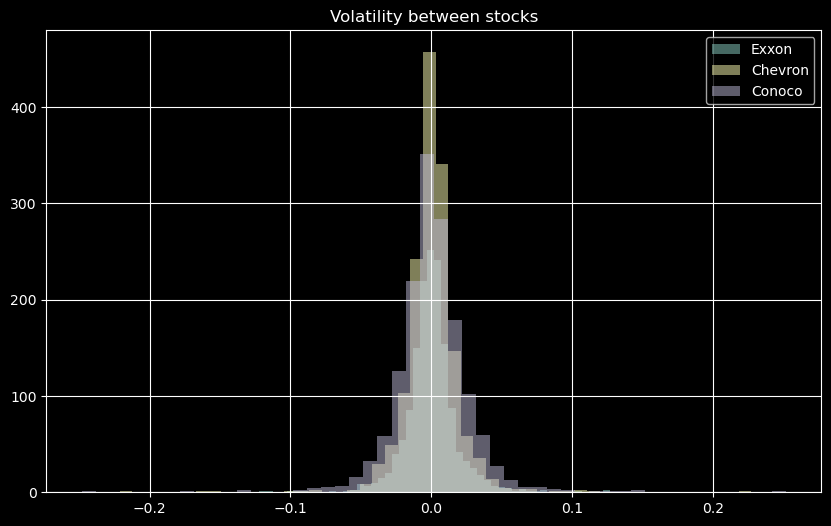

In [55]:
exxon['Daily Change'].hist(bins=50, label='Exxon', alpha=.5, figsize=(10,6))
chevron['Daily Change'].hist(bins=50, label='Chevron', alpha=.5)
conoco['Daily Change'].hist(bins=50, label='Conoco', alpha=.5)
plt.legend()
plt.title('Volatility between stocks')

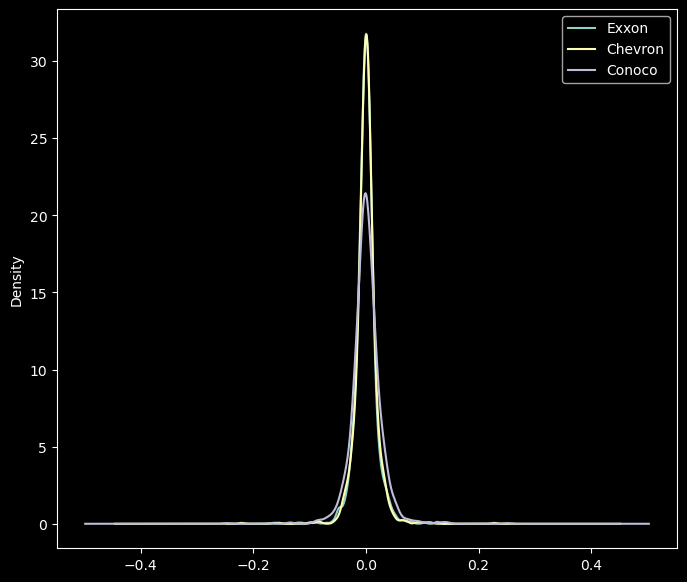

In [56]:
exxon['Daily Change'].plot(kind='kde', label='Exxon', figsize=(8,7))
chevron['Daily Change'].plot(kind='kde', label='Chevron')
conoco['Daily Change'].plot(kind='kde', label='Conoco')
plt.legend()

<AxesSubplot:>

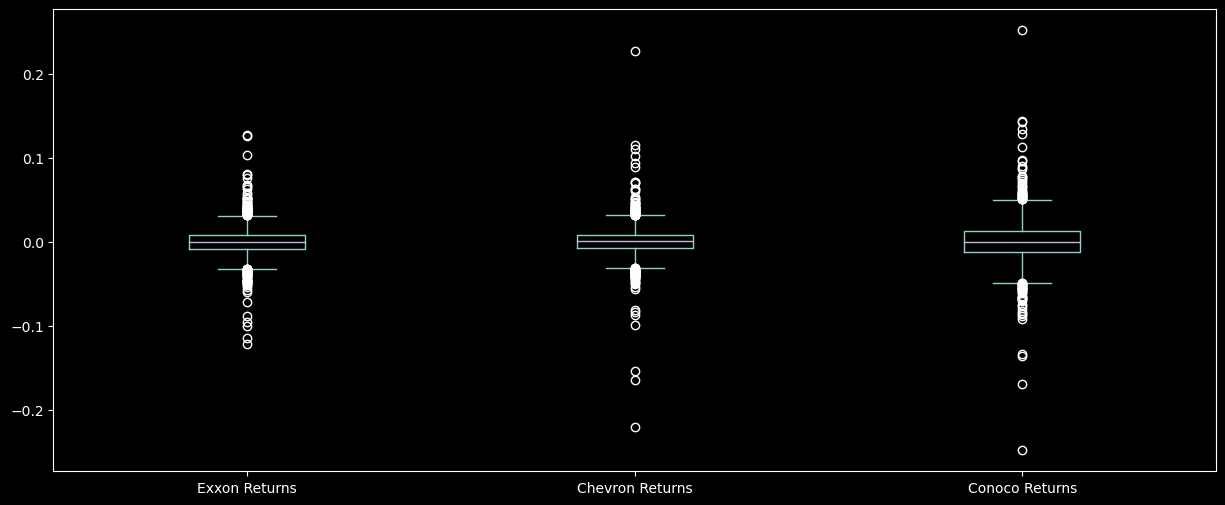

In [57]:
box_df = pd.concat([exxon['Daily Change'], chevron['Daily Change'], conoco['Daily Change']], axis=1)
box_df.columns = ['Exxon Returns','Chevron Returns','Conoco Returns']
box_df.plot(kind='box', figsize=(15,6))

### - Looking at these charts, we can rank from the most volatile to the least.  Conoco is first, Chevron second and Exxon last.

### - Now let's take a look at total volume traded between all 3 of them.

In [58]:
exxon['Total Traded'] = exxon['Open'] * exxon['Volume']
chevron['Total Traded'] = chevron['Open'] * chevron['Volume']
conoco['Total Traded'] = conoco['Open'] * conoco['Volume']

In [59]:
exxon.sample(5)

,Open,High,Low,Close,Adj Close,Volume,MA50,MA200,Daily Change,Total Traded
Date,,,,,,,,,,
2021-02-22,52.590000,54.810001,52.590000,54.299999,49.228874,36435100,46.1824,42.08595,0.036853,1.916122e+09
2017-05-26,81.610001,81.800003,80.830002,81.550003,60.536762,8227100,82.0796,85.04025,-0.002446,6.714136e+08
2019-04-03,81.769997,81.769997,80.610001,80.900002,64.441261,8562900,77.7796,79.00955,-0.005898,7.001883e+08
2016-02-22,82.500000,83.440002,82.199997,82.389999,58.517204,14595200,NaN,NaN,-0.001333,1.204104e+09
2021-02-02,45.810001,46.990002,45.279999,45.630001,40.677776,31940400,43.3320,41.66325,0.015806,1.463190e+09


Text(0.5, 1.0, 'Volume Traded')

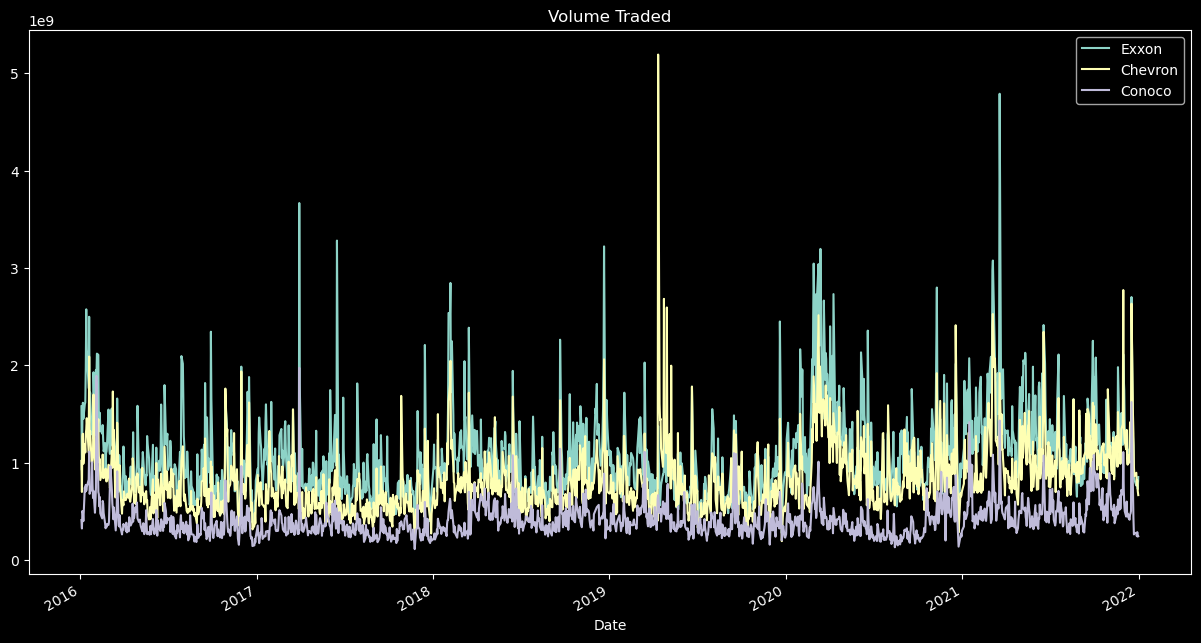

In [60]:
exxon['Total Traded'].plot(label='Exxon', figsize=(15,8))
chevron['Total Traded'].plot(label='Chevron')
conoco['Total Traded'].plot(label='Conoco')
plt.legend()
plt.title('Volume Traded')

### - Finally, let's look at the total return for all 5 stocks and compare them.  We will have to calculate cumulative returns and add values to each data frame.

In [61]:
exxon['Cumulative Return'] = (1+ exxon['Daily Change']).cumprod()
chevron['Cumulative Return'] = (1+ chevron['Daily Change']).cumprod()
conoco['Cumulative Return'] = (1+ conoco['Daily Change']).cumprod()
eog['Cumulative Return'] = (1+ eog['Daily Change']).cumprod()
occidental['Cumulative Return'] = (1+ occidental['Daily Change']).cumprod()

In [64]:
occidental.sample(5)

,Open,High,Low,Close,Adj Close,Volume,Daily Change,Cumulative Return
Date,,,,,,,,
2018-12-18,64.050003,64.320000,62.570000,63.139999,56.364109,5804700,-0.015130,0.938251
2021-05-04,26.510000,26.570000,25.120001,25.860001,25.467415,15044700,-0.010712,0.384276
2021-03-24,27.500000,27.969999,26.959999,27.059999,26.649193,15596400,0.017676,0.402108
2018-05-11,83.900002,85.790001,83.230003,84.970001,73.560417,6621300,0.013236,1.262642
2019-04-02,67.209999,67.629997,66.190002,66.629997,60.193779,3312400,-0.008187,0.990112


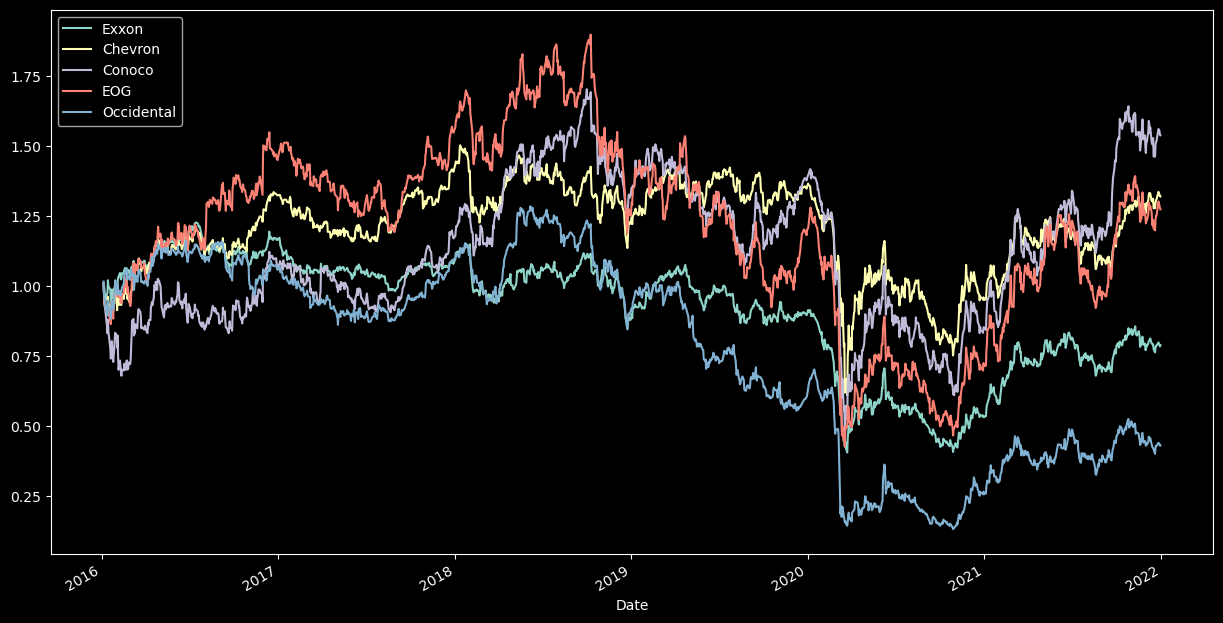

In [62]:
exxon['Cumulative Return'].plot(label='Exxon', figsize=(15,8))
chevron['Cumulative Return'].plot(label='Chevron')
conoco['Cumulative Return'].plot(label='Conoco')
eog['Cumulative Return'].plot(label='EOG')
occidental['Cumulative Return'].plot(label='Occidental')
plt.legend()

### - Overall from an investor's point of view, these five companies all tend to move together while some remain more volatile.  If you're looking for overall returns, you would want to put your money into either of the thrree Chevron, EOG or Conoco!